Imports
---

In [16]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Libraries
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

Data Loading & Printing
---

In [17]:
data = 'SMSSpamCollection.csv'

df = pd.read_csv(data, sep='\t', header = None, names= ["label","message"])
print(f'''
Frist 10 values of the dataset: \n 
{df.head(10)}\n\n
Shape of the dataset: 
{df.shape}\n\n
Null values any in the dataset
{df.isnull().sum()}
''')


Frist 10 values of the dataset: 
 
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


Shape of the dataset: 
(5572, 2)


Null values any in the dataset
label      0
message    0
dtype: int64



Preprocessing for NLP (Creating a clean text method)
---

In [18]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text (text):
    #1. Converting to lowercase
    text = text.lower()

    #2. Remove Punctuation/ special character using regex
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)

    #3. Tokenize (split into words)
    words = text.split()

    #4. Remove stopwards and apply steming
    cleaned = [stemmer.stem(word) for word in words if word not in stop_words]

    #5. Rejoin
    return " ".join(cleaned)

Apply Method to Dataset
---

In [19]:
df['cleaned_message'] = df['message'].apply(clean_text)
print(df)

     label                                            message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
5567  spam  This is the 2nd time we have tried 2 contact u...   
5568   ham               Will ü b going to esplanade fr home?   
5569   ham  Pity, * was in mood for that. So...any other s...   
5570   ham  The guy did some bitching but I acted like i'd...   
5571   ham                         Rofl. Its true to its name   

                                        cleaned_message  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri 2 wkli comp win fa cup final

In [21]:
#Check for repeated messages
#Optional Check
from collections import Counter

all_words =' '.join(df['cleaned_message']).split()
freq_words = Counter(all_words).most_common(20)

print(freq_words)

[('u', 1207), ('call', 679), ('2', 533), ('go', 456), ('get', 452), ('ur', 391), ('4', 327), ('gt', 318), ('lt', 316), ('come', 304), ('ok', 293), ('free', 284), ('day', 276), ('know', 275), ('love', 266), ('like', 261), ('time', 252), ('good', 248), ('want', 247), ('got', 240)]


Text Vectorizarion (BoW or TF_IDF)
---

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) # Use top 3000 words to limit size

X = tfidf.fit_transform(df['cleaned_message']).toarray()
print(X.shape)

(5572, 3000)


Converting label to binary values
---


In [28]:
y = df['label'].map({'ham': 0, 'spam': 1}).values

Train/Test Split & Model Training & Prediction Vizualization
---

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13412\3676431302.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = y_pred, palette='viridis')


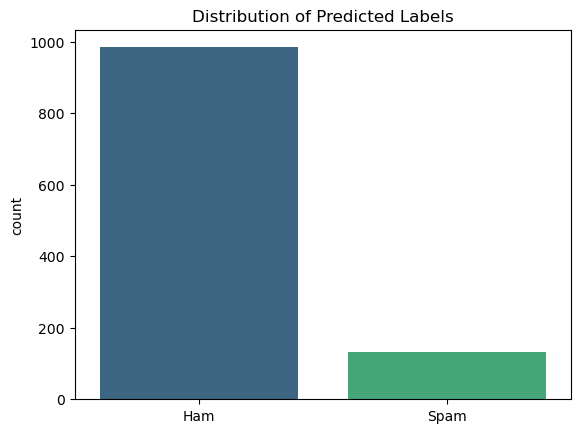

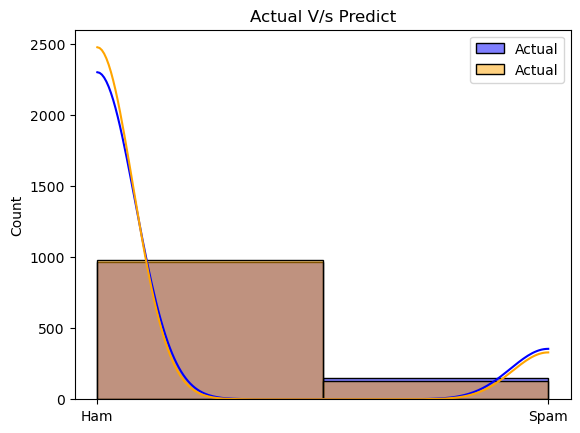

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Train model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Graphs
#Predicted Labels
sns.countplot( x = y_pred, palette='viridis')
plt.xticks([0,1],['Ham', 'Spam'])
plt.title('Distribution of Predicted Labels')
plt.show()

# Graph 2: Actual V/s Predicted
sns.histplot(y_test, color='blue', label= 'Actual', kde=True, bins = 2) #kde or Kernel Density Estimation is a smooth curve of probability distribution.
sns.histplot(y_pred, color='orange', label= 'Actual', kde=True, bins = 2) #bins shows the range of your data being split into intervals.
plt.xticks([0,1],['Ham', 'Spam'])
plt.title('Actual V/s Predict')
plt.legend()
plt.show()


Confusion Metrics (Vizualization) & Classification Report
---


Confusion Matrix:
 
[[965   1]
 [ 19 130]]

 Classification_report:

                 precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Text(50.722222222222214, 0.5, 'Actual')

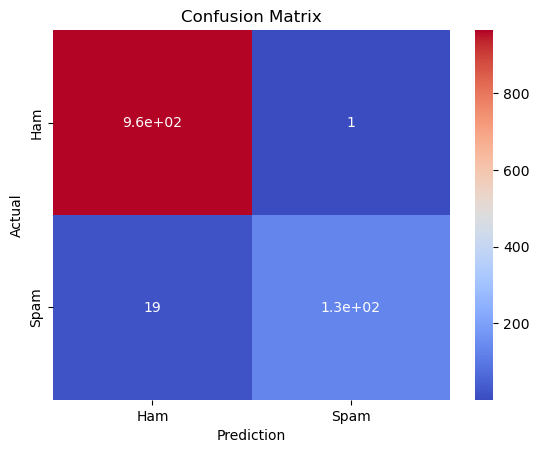

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(f'''
Confusion Matrix:\n 
{cm}

 Classification_report:\n
   {classification_report(y_test,y_pred)}''')
plt.title("Confusion Matrix")
sns.heatmap(cm, annot= True, cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Prediction')
plt.ylabel('Actual')